# Lab 4 Plotting Weather Data

 * Name: Instructor Notes
 * Course: ENGR114
 * Quarter: Winter 2020
 * Date: 2020-01-29
 * Description: Lab 4 includes a couple different plots of weather data using Matplotlib

## Ensure the .xlsx data file is in the same folder as the running Jupyter notebook

In [8]:
%ls

 Volume in drive D is LEXAR
 Volume Serial Number is 0000-0000

 Directory of D:\ENGR114-2020Q1\week4

01/29/2020  09:42 AM    <DIR>          .
01/29/2020  09:42 AM    <DIR>          ..
01/29/2020  09:44 AM    <DIR>          .ipynb_checkpoints
01/29/2020  11:05 AM            17,855 bond_energy_plot.png
01/29/2020  11:15 AM            57,586 govt_camp_2013_01_to_2016_03.xlsx
01/29/2020  11:53 AM            44,003 Lab4_Plotting_Weather_Data.ipynb
01/29/2020  11:53 AM            24,192 line_plot.png
01/29/2020  10:46 AM            30,069 plot.png
01/29/2020  11:08 AM            79,490 week4_notes_review_arrays_and_plotting.ipynb
               6 File(s)        253,195 bytes
               3 Dir(s)   1,909,358,592 bytes free


## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import the .xlsx data file into a Pandas dataframe

In [3]:
df = pd.read_excel('govt_camp_2013_01_to_2016_03.xlsx')
df.head()

,STATION,STATION_NAME,DATE,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130101,0.00,44,0.0,29,12
1,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130102,0.01,42,0.0,27,11
2,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130103,0.00,42,0.0,20,12
3,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130104,0.16,41,0.0,31,14
4,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130105,0.00,41,0.0,37,28


## Clean up the data and save the data to a NumPy array

In [4]:
df.drop(['STATION', 'STATION_NAME'], axis=1, inplace=True)
df.head()

,DATE,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,20130101,0.00,44,0.0,29,12
1,20130102,0.01,42,0.0,27,11
2,20130103,0.00,42,0.0,20,12
3,20130104,0.16,41,0.0,31,14
4,20130105,0.00,41,0.0,37,28


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.insert(0, 'year', pd.DatetimeIndex(df['DATE']).year)
df.insert(1, 'month', pd.DatetimeIndex(df['DATE']).month)
df.insert(2, 'day', pd.DatetimeIndex(df['DATE']).day)
df.drop(['DATE'], axis=1, inplace=True)
print(df.shape)
df.head()

(1186, 8)


,year,month,day,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,2013,1,1,0.00,44,0.0,29,12
1,2013,1,2,0.01,42,0.0,27,11
2,2013,1,3,0.00,42,0.0,20,12
3,2013,1,4,0.16,41,0.0,31,14
4,2013,1,5,0.00,41,0.0,37,28


In [6]:
wd = np.array(df)
print(wd)

[[2.013e+03 1.000e+00 1.000e+00 ... 0.000e+00 2.900e+01 1.200e+01]
 [2.013e+03 1.000e+00 2.000e+00 ... 0.000e+00 2.700e+01 1.100e+01]
 [2.013e+03 1.000e+00 3.000e+00 ... 0.000e+00 2.000e+01 1.200e+01]
 ...
 [2.016e+03 3.000e+00 2.900e+01 ... 0.000e+00 3.300e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.000e+01 ... 0.000e+00 4.700e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.100e+01 ... 0.000e+00 5.900e+01 3.200e+01]]


## Create a line plot

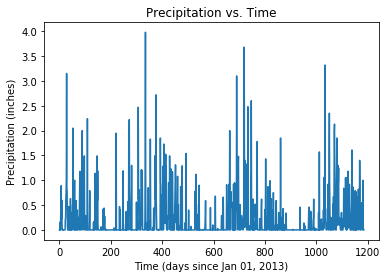

In [7]:
# create data to plot
y = wd[:,3]
x = np.arange(0,len(y),1)

# create fig and ax objects
fig, ax = plt.subplots()

# plot the data on the ax object
ax.plot(x,y)

# customize the plot
ax.set_title('Precipitation vs. Time')
ax.set_ylabel('Precipitation (inches)')
ax.set_xlabel('Time (days since Jan 01, 2013)')

# save the plot to a .png file
fig.savefig('line_plot.png')

# show the plot
plt.show()